# Prieskumná analýza
Autori: Michal Zajic, Tibor Zalabai

Cvičenie: 18:00 Štvrtok

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

## Personal data

In [32]:
personal_data = pd.read_csv('./data/personal_train.csv')
personal_data = personal_data.drop(['Unnamed: 0'], axis=1)
personal_data.head()

,name,address,age,sex,date_of_birth
0,Edith Boudreaux,"11818 Lori Crossing Apt. 802\r\nPughstad, DC 7...",78.0,F,1940-02-11 00:00:00
1,Terry Terry,"PSC 4657, Box 5446\r\nAPO AP 58412",75.0,M,1943-04-25
2,Janet Washington,Unit 9759 Box 9470\r\nDPO AP 45549,41.0,F,1977/06/09
3,Margaret Chabot,"137 Lewis Flat Suite 762\r\nWest Elizabeth, AL...",74.0,F,1944-09-20
4,Colleen Satterwhite,"995 Frank Stravenue\r\nSouth Matthewport, TX 8...",37.0,F,1980-11-30


Výpis prvých 5 údajov, z ktorých si vieme hneď predstaviť, aké dáta sú v datasete reprezentované

In [33]:
len(personal_data.columns)

5

In [34]:
personal_data.dtypes

name              object
address           object
age              float64
sex               object
date_of_birth     object
dtype: object

V našom personal_data je konkrétne 6 stĺpcov, ktoré sú reprezentované nasledovne: id používateľa je unikátny integer. Name reprezentuje krstné meno a priezvisko. Adresa je, ako môžeme vidieť veľmi nekonzistentná, a nie je z prvého pohľadu vidieť, o aké údaje sa jedná. Vek je reprezentovaný floatom, pohlavie je označované jedným písmenom (pokiaľ sa jedná o validnú bunku). Posledným údajom je rok narodenia, ktorý hneď z prvého pohľadu nie je konzistentný, a je vo viacerých formátoch (YYYY/MM/DD alebo YYYY-DD-MM).

In [35]:
personal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 5 columns):
name             2237 non-null object
address          2237 non-null object
age              2236 non-null float64
sex              2237 non-null object
date_of_birth    2236 non-null object
dtypes: float64(1), object(4)
memory usage: 87.5+ KB


Tento dataset nie je veľký, a jeho hlavnou náplňou sú osobné údaje.Všetky stĺpce obsahujú 2237 riadkov až na stĺpec age ktorý obsahuje o jeden záznam menej.

In [36]:
personal_data[personal_data['age'].isnull()]

,name,address,age,sex,date_of_birth
1988,Brenda Wojciechowski,155 Johnson Circles Suite 311\r\nSouth Michael...,NaN,F,NaN


Potvrdilo sa že riadok s id 1988 nemá vyplnený age a teda ani date_of_birth tento údaj bude možné doplniť vekovým priemerom príslušného pohlavia.

In [37]:
personal_data.describe()

,age
count,2236.000000
mean,51.822004
std,20.884439
min,1.000000
25%,36.000000
50%,54.000000
75%,67.000000
max,455.000000


Po zadaní príkazu Describe sa z vypočítateľných stĺpcov (čiže len Age). Môžeme v ňom vidieť vekový priemer, medián, horný a dolný kvartil.

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

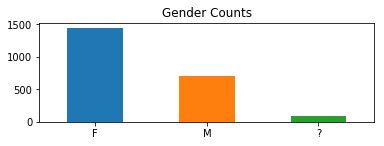

In [38]:
fig_dims = (2, 1)

plt.subplot2grid(fig_dims, (1, 0))
personal_data['sex'].value_counts().plot(kind='bar', 
                                    title='Gender Counts')
plt.xticks(rotation=0)

Graf nám hovorí že sa v personal_train nachádzajú aj dáta ktoré nemajú vyplnený gender. Dáta sa budú dať upraviť buď doplnením o prevládajúce pohlavie alebo nepočítať s tymito údajmi.

In [39]:
personal_data[(personal_data['sex'] != 'F') & (personal_data['sex'] != 'M')].count()

name             88
address          88
age              88
sex              88
date_of_birth    88
dtype: int64

Je ich presne 88 ktoré bude treba modifikovať.

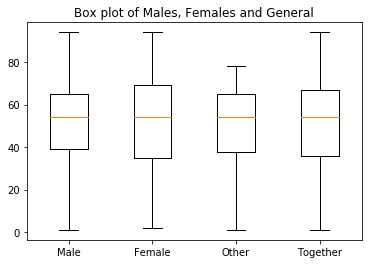

In [40]:
male = personal_data[personal_data['sex'] == 'M']
male = male[~np.isnan(male['age'])]

female = personal_data[personal_data['sex'] == 'F']
female = female[~np.isnan(female['age'])]


other = personal_data[personal_data['sex'] == '?']
other = other[~np.isnan(other['age'])]

data = [male['age'], female[female['age']< 150]['age'],other['age'], personal_data[personal_data['age']<150]['age']]

fig1, ax1 = plt.subplots()
ax1.set_title('Box plot of Males, Females and General')
ax1.boxplot(data)
plt.xticks([1,2,3,4], ['Male', 'Female','Other', 'Together'])
plt.show()

Prostredníctvom tohto Box Plou sme znázornili,  aký je je vekový priemer, horný kvartil a dolný kvartil veku mužov, žien a dohromady.

## Other data

In [41]:
#OTHER CSSV
other_data = pd.read_csv('./data/other_train.csv')
other_data = other_data.drop(['Unnamed: 0'],axis=1)
other_data.head()

,name,address,query hyperthyroid,FTI measured,education,lithium,TT4,T4U,capital-loss,capital-gain,...,hypopituitary,medical_info,on antithyroid medication,referral source,education-num,occupation,TBG measured,TBG,race,FTI
0,Shondra Burns,1752 Charles Bypass Suite 311\r\nWest Kristinv...,f,t,Some-college,f,109.0,0.96,0.0,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,other,10.0,Other-service,f,?,White,114
1,Tony Decaire,"33993 Jones Keys Suite 315\r\nNewtonview, OK 0...",f,t,HS-grad,f,98.0,0.83,0.0,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,other,9.0,Sales,f,?,White,119
2,Ruby Presson,"05084 Robert Wall\r\nParkburgh, SC 25164",f,t,Bachelors,f,144.0,0.95,0.0,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,SVI,NaN,Sales,f,?,White,152
3,Randy Stewart,Unit 7068 Box 5314\r\nDPO AE 22517,f,t,Some-college,f,114.0,0.90,0.0,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,SVI,NaN,Prof-specialty,f,?,White,128
4,Harriet Griffin,"169 Allison Landing\r\nBrianton, AZ 04857",f,t,Masters,f,99.0,1.04,0.0,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",F,SVI,14.0,Prof-specialty,f,?,White,96


Ďalším datasetom sú záznamy o ľuďoch, v ktorých sú napísané okrem mena, adresy, rasy, typu vzdelania, krajiny, rodinnému statusu, práci aj údaje z vyšetrení (ako napríklad, či je chorý, či má nádor, či mu boli poskytnuté rôzne vyšetrenia..)

In [42]:
other_data.dtypes

name                          object
address                       object
query hyperthyroid            object
FTI measured                  object
education                     object
lithium                       object
TT4                          float64
T4U                          float64
capital-loss                 float64
capital-gain                 float64
tumor                         object
TSH                          float64
T3                           float64
fnlwgt                       float64
hours-per-week               float64
relationship                  object
sick                          object
workclass                     object
TT4 measured                  object
class                         object
marital-status                object
goitre                        object
native-country                object
hypopituitary                 object
medical_info                  object
on antithyroid medication     object
referral source               object
e

V našom datasete je najviac stĺpcov typu object, druhým najpočetnejším je float, a tretím typom je id.

In [43]:
len(other_data.columns)

33

Počet stĺpcov je oveľa väčší ako pri Personal_data, a to kvôli medicínskym údajom.

In [44]:
other_data.describe()

,TT4,T4U,capital-loss,capital-gain,TSH,T3,fnlwgt,hours-per-week,education-num
count,2128.000000,2038.000000,2277.000000,2.282000e+03,2048.000000,1805.000000,2278.000000,2275.000000,2048.000000
mean,109.487030,0.996749,72.166886,5.206411e+02,4.501296,2.025152,187211.198420,38.010549,10.041504
std,35.882326,0.192079,373.416778,5.963641e+04,20.248856,0.814956,107023.327923,11.842891,2.447641
min,2.000000,0.310000,0.000000,-1.502400e+06,0.005000,0.050000,19395.000000,1.000000,1.000000
25%,88.000000,0.880000,0.000000,0.000000e+00,0.447500,1.600000,116411.750000,35.000000,9.000000
50%,104.000000,0.980000,0.000000,0.000000e+00,1.400000,2.000000,177094.500000,40.000000,10.000000
75%,126.000000,1.080000,0.000000,0.000000e+00,2.600000,2.400000,232851.500000,40.000000,12.000000
max,430.000000,2.120000,3900.000000,1.355000e+06,478.000000,10.600000,913447.000000,99.000000,16.000000


V describe sme znázornili, okolo akých hodnôt sa prevažne pohybujú stĺpce ako TT4,T4U, TSH, hours per week, alebo capital Gain.

In [45]:
other_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 33 columns):
name                         2287 non-null object
address                      2287 non-null object
query hyperthyroid           2276 non-null object
FTI measured                 2278 non-null object
education                    2281 non-null object
lithium                      2279 non-null object
TT4                          2128 non-null float64
T4U                          2038 non-null float64
capital-loss                 2277 non-null float64
capital-gain                 2282 non-null float64
tumor                        2276 non-null object
TSH                          2048 non-null float64
T3                           1805 non-null float64
fnlwgt                       2278 non-null float64
hours-per-week               2275 non-null float64
relationship                 2279 non-null object
sick                         2275 non-null object
workclass                    2276 n

Nie každý záznam má vyplnené všetky údaje bude potrebné spracovať jednotlivé stĺpce a doplniť ich.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

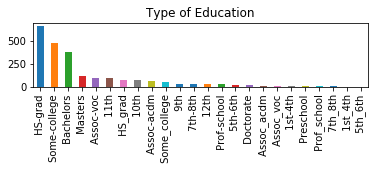

In [46]:
fig_dims = (3, 1)

plt.subplot2grid(fig_dims, (1, 0))
other_data['education'].value_counts().plot(kind='bar', 
                                    title='Type of Education')
plt.xticks(rotation=90)

V nasledujúcom stĺpcovom grafe demonštrujeme rôznorodosť dosiahnutého vzdelania u ľudí v datasete. Ako vidíme, najpočetnejším vzdelaním, aký ľudia v našom datasete dosiahli, je stredná škola.

In [47]:
other_data['query hyperthyroid'].value_counts()

f      2135
t       140
f.8       1
Name: query hyperthyroid, dtype: int64

In [48]:
other_data['FTI measured'].value_counts()

t      2043
f       234
t.4       1
Name: FTI measured, dtype: int64

In [49]:
other_data['lithium'].value_counts()

f      2267
t        11
f.9       1
Name: lithium, dtype: int64

In [50]:
other_data['hypopituitary'].value_counts()

f       2281
f.12       1
Name: hypopituitary, dtype: int64

In [51]:
other_data['on antithyroid medication'].value_counts()

f        2026
F         113
FALSE     113
t          24
TRUE        2
T           1
f.2         1
Name: on antithyroid medication, dtype: int64

In [52]:
other_data['TBG measured'].value_counts()

f       2281
f.14       1
Name: TBG measured, dtype: int64

V predchádzajúcich countoch a nasledujúcich grafoch poukazujeme na to, v akom pomere sú TRUE/FALSE stĺpce. V žiadnom zo stĺpcov nie je vybalancovaný počet true a false záznamov. Dokonca môžeme vidieť nekonzistentnosť dát a chybné údaje ako f.14, t.4 a podobne.

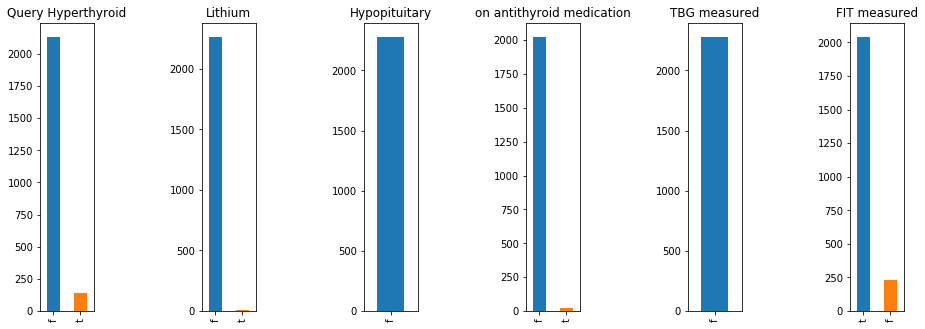

In [53]:


fig, axs = plt.subplots(1,6)
other_data[(other_data['query hyperthyroid'] == 't') | (other_data['query hyperthyroid'] == 'f')]['query hyperthyroid'].value_counts().plot(ax=axs[0],kind='bar', 
                                    title='Query Hyperthyroid')

other_data[(other_data['lithium'] == 't') | (other_data['lithium'] == 'f')]['lithium'].value_counts().plot(ax=axs[1],kind='bar', 
                                    title='Lithium')
other_data[(other_data['hypopituitary'] == 't') | (other_data['hypopituitary'] == 'f')]['hypopituitary'].value_counts().plot(ax=axs[2],kind='bar', 
                                    title='Hypopituitary')
other_data[(other_data['on antithyroid medication'] == 't') | (other_data['on antithyroid medication'] == 'f')]['on antithyroid medication'].value_counts().plot(ax=axs[3],kind='bar', 
                                    title='on antithyroid medication')
other_data[(other_data['TBG measured'] == 't') | (other_data['TBG measured'] == 'f')]['TBG measured'].value_counts().plot(ax=axs[4],kind='bar', 
                                    title='TBG measured') 
other_data[(other_data['FTI measured'] == 't') | (other_data['FTI measured'] == 'f')]['FTI measured'].value_counts().plot(ax=axs[5],kind='bar', 
                                    title='FIT measured')
plt.subplots_adjust(left=4, bottom=3, right=6, top=4, wspace=2, hspace=1)

#there are more True/false collumns such as:
# tumor, sick, tt4 masured, goitre, 


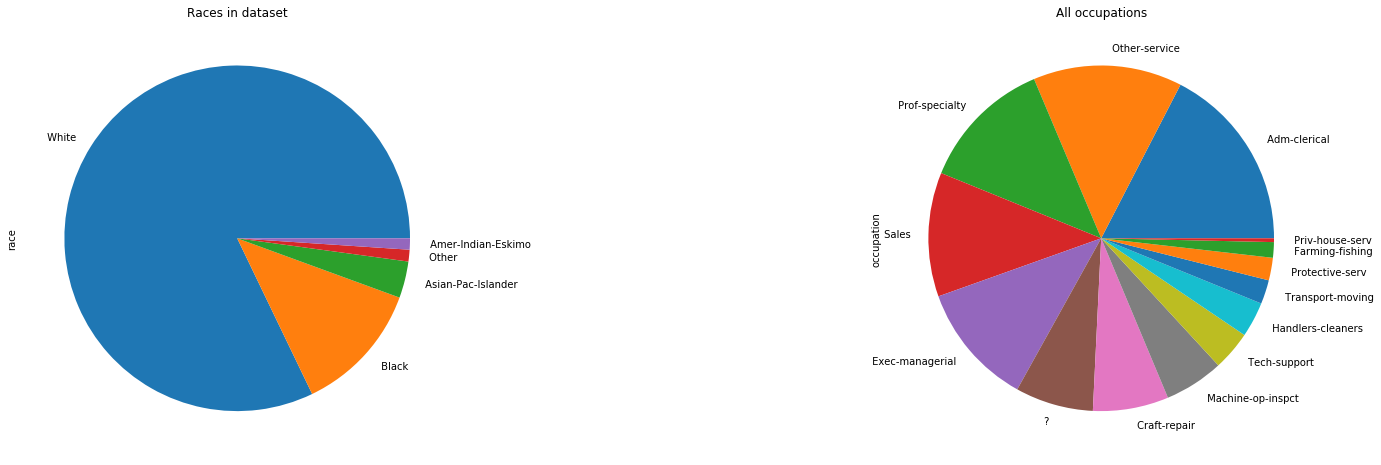

In [54]:
fig, axs = plt.subplots(1,2)
other_data.race.value_counts().plot(ax=axs[0],kind='pie', title='Races in dataset')
other_data.occupation.value_counts().plot(ax=axs[1],kind='pie',title='All occupations')
plt.subplots_adjust(left=0, bottom=0, right=3, top=1.5, wspace=1, hspace=0)
#fix this plsss

V nasledujúcich 2 grafov vidíme už spomenutú rôznorodosť záznamov (aj pri type zamestnania alebo rase).

In [55]:
other_data["relationship"].value_counts()

 Not-in-family     754
 Husband           446
 Own-child         406
 Unmarried         384
 Wife              211
 Other-relative     78
Name: relationship, dtype: int64

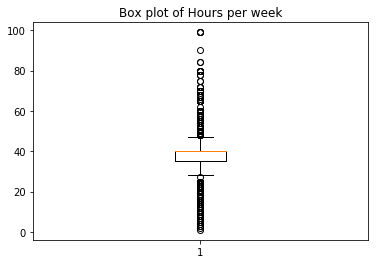

In [56]:
male = other_data[~other_data['hours-per-week'].isnull()]['hours-per-week']

fig1, ax1 = plt.subplots()
ax1.set_title('Box plot of Hours per week')
ax1.boxplot(male)
plt.show()

Pomocou boxplotu sme znázornili distribúciu dát v stĺpci hours-per-week a vidíme že za predpokladu že tieto hodnoty znamenajú počet hodín u doktora za týždeň priemer sa pohybuje okolo 40 hodín týždenne.

## Hypotézy

### 1. Ak je človek chorý tak ma vyššiu TT4

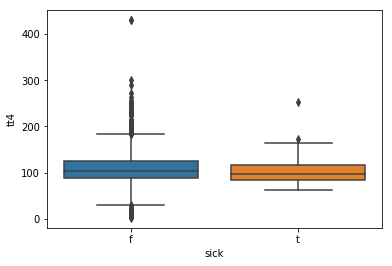

In [57]:
tt4_sick = other_data[other_data['sick']=='t']['TT4']
tt4_sick = tt4_sick.astype(str).astype(float)
tt4_sick = tt4_sick[~tt4_sick.isnull()]
tt4_not_sick = other_data[other_data['sick']=='f']['TT4']
tt4_not_sick = tt4_not_sick.astype(str).astype(float)
tt4_not_sick = tt4_not_sick[~tt4_not_sick.isnull()]
sick = other_data[(other_data['sick']=='t') | (other_data['sick']=='f')]['sick']
df = pd.DataFrame({'sick':sick, 'tt4':other_data['TT4']})
sns.boxplot('sick','tt4',data = df)

V danom boxplote ukazujeme, aké TT4 majú záznamy ľudí, ktorý sú buď zdravý, alebo chorý. Ako môžeme vidieť, hodnoty TT4, pokiaľ je človek chorý, sú vyššie a viac sa vychylujú

### Predpoklady t-testu
1.Vizualizácia pomocou histogramu

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


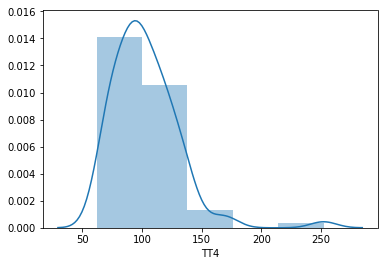

In [58]:
sns.distplot(tt4_sick,bins=5)

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


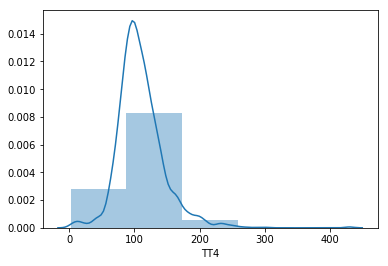

In [59]:
sns.distplot(tt4_not_sick,bins=5)

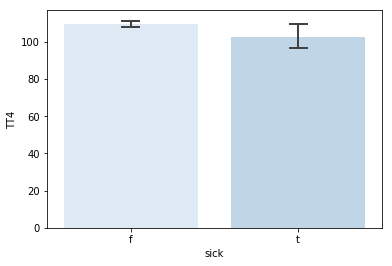

In [60]:
sns.barplot(x='sick', y='TT4', data=other_data[(other_data['sick'] == 't') | (other_data['sick'] == 'f')], 
            capsize=0.1, errwidth=2, palette=sns.color_palette("Blues"))

Tu vidíme, že naše tvrdenie je vyvrátené.

2.Shapiro-Wilkov test

In [61]:
stats.shapiro(tt4_sick)

(0.8600901365280151, 2.751570207237819e-07)

In [62]:
stats.shapiro(tt4_not_sick)

(0.9141352772712708, 1.8246177597097092e-32)

V oboch dátových sadách je hodnota p < 0.05, a teda nemôžeme použiť parametrizovaný test T-test, ale musíme použiť neparametrizovaný, čiže Mann Whitney U-Test

In [63]:
stats.mannwhitneyu(tt4_sick, tt4_not_sick)

MannwhitneyuResult(statistic=72239.0, pvalue=0.020185901400675346)

p > 0,05 to znamená že nemôžeme zamietnuť nulovú hypotézu.

### 2.  Ak má hypertyreózu (nadmerná produkcia hormónov štítnej žlazy) tak má vyšiu TT4 

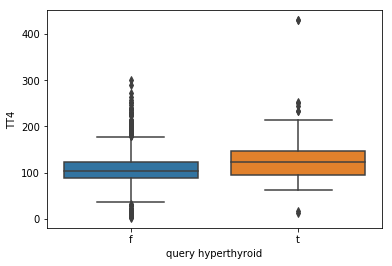

In [64]:
has_query_hyperthyroid = other_data[other_data['query hyperthyroid'] == 't']['TT4']
has_query_hyperthyroid = has_query_hyperthyroid[~has_query_hyperthyroid.isnull()]
no_query_hyperthyroid = other_data[other_data['query hyperthyroid'] == 'f']['TT4']
no_query_hyperthyroid = no_query_hyperthyroid[~no_query_hyperthyroid.isnull()]
query_hyperthyroid = other_data[(other_data['query hyperthyroid'] == 't') | (other_data['query hyperthyroid'] == 'f')]['query hyperthyroid']
df = pd.DataFrame({'query hyperthyroid':query_hyperthyroid, 'TT4':other_data['TT4']})
sns.boxplot('query hyperthyroid','TT4',data = df)


V tomto boxplote vidíme, že pokiaľ majú ľudia zvýšenú produkciu štítnej žľazy, tak majú obvykle vyššie hodnoty TT4

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


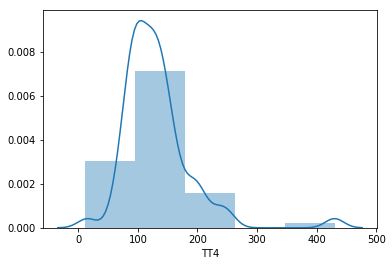

In [65]:
sns.distplot(has_query_hyperthyroid,bins=5)

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


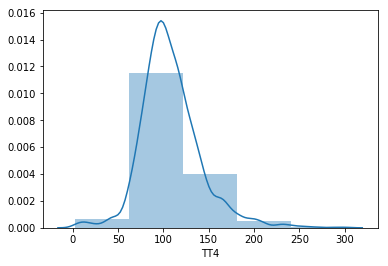

In [66]:
sns.distplot(no_query_hyperthyroid,bins=5)

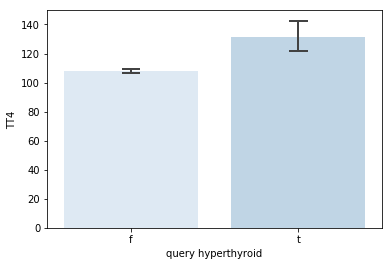

In [67]:
sns.barplot(x='query hyperthyroid', y='TT4', data=other_data[(other_data['query hyperthyroid'] == 't') | (other_data['query hyperthyroid'] == 'f')], 
            capsize=0.1, errwidth=2, palette=sns.color_palette("Blues"))

V tomto grafe vidíme, že hodnoty - pokiaľ má človek hypertiriózu dosahujú vyššie čísla TT4 (čo sme aj tvrdili).

In [68]:
stats.shapiro(has_query_hyperthyroid)

(0.813005805015564, 3.709164572707202e-11)

In [69]:
stats.shapiro(no_query_hyperthyroid)

(0.9445138573646545, 9.372779971161498e-27)

In [70]:
stats.mannwhitneyu(has_query_hyperthyroid,no_query_hyperthyroid)

MannwhitneyuResult(statistic=88950.5, pvalue=2.9238787446533285e-07)